In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [2]:
dfcsv=pd.read_csv("uscancityloc.csv")
dfcsv.head()

City   Latitude   Longitude
0       Albany, N.Y.  42.652579  -73.756232
1  Albuquerque, N.M.  35.084386 -106.650422
2     Amarillo, Tex.  35.221997 -101.831297
3  Anchorage, Alaska  61.218056 -149.900278
4       Atlanta, Ga.  33.748995  -84.387982

In [3]:
latitude = 40.9611755
longitude = -92.9987941999999
map_usacan = folium.Map(location=[latitude, longitude], zoom_start=4)
map_usacan

In [4]:
for lat, lng, label in zip(dfcsv['Latitude'], dfcsv['Longitude'], dfcsv['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_usacan)  

map_usacan

In [5]:
CLIENT_ID = '3LBVDNDE4N0IN4SU142H43P0E2CMWOCXOKABJHIXXIHLRPZQ' # your Foursquare ID
CLIENT_SECRET = 'A41MGCMQCAUQBR3CBWJVAPGG5PDET2GISYLGTPHTSTA5CNXF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3LBVDNDE4N0IN4SU142H43P0E2CMWOCXOKABJHIXXIHLRPZQ
CLIENT_SECRET:A41MGCMQCAUQBR3CBWJVAPGG5PDET2GISYLGTPHTSTA5CNXF


In [6]:
city_latitude = dfcsv.loc[0, 'Latitude'] # neighborhood latitude value
city_longitude = dfcsv.loc[0, 'Longitude'] # neighborhood longitude value

city_name = dfcsv.loc[0, 'City'] # neighborhood name
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 15000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)
url # display URL

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e59420229ce6a001c4ac850'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Albany',
  'headerFullLocation': 'Albany',
  'headerLocationGranularity': 'city',
  'totalResults': 236,
  'suggestedBounds': {'ne': {'lat': 42.787579435000126,
    'lng': -73.57301954373342},
   'sw': {'lat': 42.51757916499986, 'lng': -73.93944385626658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55f6d343498edb711f07a4e1',
       'name': 'Renaissance Albany Hotel',
       'location': {'address': '144 State St',
        'crossStreet': 'Eagle Street',
        'lat': 42.65062486985366,
        'lng': -73.7556865811348,
       

In [7]:
venues = results['response']['groups'][0]['items']

In [8]:
nearby_venues = json_normalize(venues)

In [9]:
nearby_venues

referralId  reasons.count  \
0    e-0-55f6d343498edb711f07a4e1-0              0   
1    e-0-4b44cc03f964a52076fc25e3-1              0   
2    e-0-4b8318c7f964a52075f730e3-2              0   
3    e-0-4e67f20e8877dfcf3063f687-3              0   
4    e-0-5829d0653398744fe49d3d79-4              0   
5    e-0-4b796b84f964a5209cf82ee3-5              0   
6    e-0-4ddebae4227106a58b92825b-6              0   
7    e-0-52798c85498ead232547b479-7              0   
8    e-0-4f6fa8b3e4b0463c95c4594c-8              0   
9    e-0-53641ff3498e59813d36dff5-9              0   
10  e-0-4b317ffef964a520050825e3-10              0   
11  e-0-53e22f5b498ea67f3a34dd04-11              0   
12  e-0-5565069c498e4238adc2b862-12              0   
13  e-0-4bb6860def159c74901c76f7-13              0   
14  e-0-545ed831498e128ccabe11b8-14              0   
15  e-0-4ba29ad1f964a5207f0838e3-15              0   
16  e-0-4b8c549bf964a520f7ca32e3-16              0   
17  e-0-4b49cd58f964a520d77326e3-17              0   
18  e-0-4eb70ad3cc2143e828ad5f5e-18              0   
19  e-0-4afdd0a4f964a520232b22e3-19              0   
20  e-0-4b69a885f964a520c1ab2be3-20              0   
21  e-0-4ca9efab97c8a1cd389a93a5-21              0   
22  e-0-4b44dc0ef964a5207cfe25e3-22              0   
23  e-0-4b6cd6d2f964a5202b582ce3-23              0   
24  e-0-57407516cd10a3bfc8065ce2-24              0   
25  e-0-4b7236c8f964a5202e742de3-25              0   
26  e-0-59a32c529e3b655b39f07de1-26              0   
27  e-0-4b4975f0f964a520187026e3-27              0   
28  e-0-4bcf686dcaff95213a1ccdf0-28              0   
29  e-0-52eda6b811d22fcf7886872e-29              0   
30  e-0-55f35fb9498eccb32df1e0a8-30              0   
31  e-0-4b4631acf964a520a61926e3-31              0   
32  e-0-4bacd0a9f964a5207c0e3be3-32              0   
33  e-0-4d1e0f7ee56f6ea8953f611d-33              0   
34  e-0-4bc1e84e4cdfc9b65e2e9521-34              0   
35  e-0-4b46190ff964a5204b1626e3-35              0   
36  e-0-51bfa50d498e6aea786ef072-36              0   
37  e-0-4b723080f964a52039732de3-37              0   
38  e-0-522bc57a11d2b45f00da95da-38              0   
39  e-0-59ba625386bc49168b548e4f-39              0   
40  e-0-4b49e40df964a520797526e3-40              0   
41  e-0-4bee0c6fa40fc9285dfd820c-41              0   
42  e-0-4c78fae3794e224b87d06328-42              0   
43  e-0-4bddaa5a0ee3a593d7222eb0-43              0   
44  e-0-52eda9f111d2e3815798776e-44              0   
45  e-0-4b65c5c9f964a520c1fe2ae3-45              0   
46  e-0-4b42b141f964a520d1d825e3-46              0   
47  e-0-4b646950f964a52011b12ae3-47              0   
48  e-0-563cbb26cd10abb69fdad361-48              0   
49  e-0-4b6b92c7f964a520a1102ce3-49              0   
50  e-0-5a292205bed48327f0302305-50              0   
51  e-0-4bce62ea68f976b09a136683-51              0   
52  e-0-5171ecdee4b082437fef80b3-52              0   
53  e-0-4be59c35cf200f470f6c133c-53              0   
54  e-0-4b619e9cf964a520581a2ae3-54              0   
55  e-0-4b775ac1f964a5208d942ee3-55              0   
56  e-0-4bf30ce4706e20a13dc9a798-56              0   
57  e-0-5418a56f498e21780cf4e3f1-57              0   
58  e-0-4b55fe71f964a520e9fa27e3-58              0   
59  e-0-4f4515e6af242292cadfca58-59              0   
60  e-0-4bd44cac462cb71342f6df07-60              0   
61  e-0-4b646d69f964a52045b22ae3-61              0   
62  e-0-4bc9af080687ef3b9a45dacc-62              0   
63  e-0-4d593cf07e2237047fb5ae73-63              0   
64  e-0-4b998b84f964a520738235e3-64              0   
65  e-0-4d3870633ffba14314805c56-65              0   
66  e-0-4c1fb6a763750f47c18ebb67-66              0   
67  e-0-56a035b7498eb598dd265183-67              0   
68  e-0-4c430616ff711b8d3b501405-68              0   
69  e-0-4c26943ba852c9283ef1e66c-69              0   
70  e-0-5585fbdd498ec6f8c592152a-70              0   
71  e-0-4bbb348c7421a593e785c440-71              0   
72  e-0-4b521867f964a520656727e3-72              0   
73  e-0-52d9739211d26708eff54

In [10]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

In [11]:
nearby_venues

venue.name  \
0                            Renaissance Albany Hotel   
1                                      Iron Gate Cafe   
2                                      Palace Theatre   
3                       The Olde English Pub & Pantry   
4                      Stacks Espresso Bar - Downtown   
5                               New York State Museum   
6                                      City Beer Hall   
7                       Umana Wine Bar and Restaurant   
8                                              Shogun   
9                                 Stacks Espresso Bar   
10                                    Washington Park   
11                                 Cider Belly Donuts   
12                               Druthers Brewing Co.   
13                                    Emack & Bolio's   
14                                    Public House 42   
15                                       Lincoln Park   
16                                Spectrum 8 Theatres   
17                                            The Egg   
18                                            Risotto   
19  C.H. Evans Brewing Co. at the Albany Pump Station   
20                        Van's Vietnamese Restaurant   
21                               Hampton Inn & Suites   
22                                    The Daily Grind   
23                                       Salsa Latina   
24                                 Berben and Wolff's   
25                                   Hill Street Cafe   
26                                       Lost & Found   
27                                 Empire State Plaza   
28                                   Ragonese Imports   
29                                Albany Ale & Oyster   
30                                              Crave   
31                                McGeary's Irish Pub   
32                Albany Institute Of History And Art   
33                                       Pepper Jacks   
34                                       Cafe Madison   
35                                  Stagecoach Coffee   
36                           Honest Weight Food Co-op   
37                          Capital Repertory Theatre   
38                                         The Hollow   
39                                      Cuckoo's Nest   
40                      Oliver's Beverage (Brew Crew)   
41                               Grappa 72 Ristorante   
42                                       Jack's Diner   
43                            Capital Hills at Albany   
44                                  Madison Pourhouse   
45                   Cracker Barrel Old Country Store   
46                                          Sake Cafe   
47                                          Five Guys   
48                           Il Faro Restaurant & Bar   
49                                           Junior's   
50                       Shop Rite Of North Greenbush   
51                                   Cumberland Farms   
52                                         16 Handles   
53                                Genoa Importing Co.   
54                            Uncommon Grounds Coffee   
55                           The Crossings of Colonie   
56                                     Paesan's Pizza   
57                            City Line Bar and Grill   
58                       children's museum of science   
59                                       Trader Joe's   
60                                   Johnny B's Diner   
61                                Best Fitness Albany   
62                                    Schuyler Bakery   
63                 DiBella's Old Fashioned Submarines   
64                                       Lanie's Cafe   
65                            Mr. Fuji Sushi - Albany   
66                                      Lickety Split   
67                                        Blaze Pizza   
68                                            Dunkin'   
69                               Barcelona Restaurant

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

In [14]:
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [113]:
nearby_venues

name  \
0                            Renaissance Albany Hotel   
1                                      Iron Gate Cafe   
2                                      Palace Theatre   
3                       The Olde English Pub & Pantry   
4                      Stacks Espresso Bar - Downtown   
5                               New York State Museum   
6                                      City Beer Hall   
7                       Umana Wine Bar and Restaurant   
8                                              Shogun   
9                                 Stacks Espresso Bar   
10                                    Washington Park   
11                                 Cider Belly Donuts   
12                               Druthers Brewing Co.   
13                                    Emack & Bolio's   
14                                    Public House 42   
15                                       Lincoln Park   
16                                Spectrum 8 Theatres   
17                                            The Egg   
18                                            Risotto   
19  C.H. Evans Brewing Co. at the Albany Pump Station   
20                        Van's Vietnamese Restaurant   
21                               Hampton Inn & Suites   
22                                    The Daily Grind   
23                                       Salsa Latina   
24                                 Berben and Wolff's   
25                                   Hill Street Cafe   
26                                       Lost & Found   
27                                 Empire State Plaza   
28                                   Ragonese Imports   
29                                Albany Ale & Oyster   
30                                              Crave   
31                                McGeary's Irish Pub   
32                Albany Institute Of History And Art   
33                                       Pepper Jacks   
34                                       Cafe Madison   
35                                  Stagecoach Coffee   
36                           Honest Weight Food Co-op   
37                          Capital Repertory Theatre   
38                                         The Hollow   
39                                      Cuckoo's Nest   
40                      Oliver's Beverage (Brew Crew)   
41                               Grappa 72 Ristorante   
42                                       Jack's Diner   
43                            Capital Hills at Albany   
44                                  Madison Pourhouse   
45                   Cracker Barrel Old Country Store   
46                                          Sake Cafe   
47                                          Five Guys   
48                           Il Faro Restaurant & Bar   
49                                           Junior's   
50                       Shop Rite Of North Greenbush   
51                                   Cumberland Farms   
52                                         16 Handles   
53                                Genoa Importing Co.   
54                            Uncommon Grounds Coffee   
55                           The Crossings of Colonie   
56                                     Paesan's Pizza   
57                            City Line Bar and Grill   
58                       children's museum of science   
59                                       Trader Joe's   
60                                   Johnny B's Diner   
61                                Best Fitness Albany   
62                                    Schuyler Bakery   
63                 DiBella's Old Fashioned Submarines   
64                                       Lanie's Cafe   
65                            Mr. Fuji Sushi - Albany   
66                                      Lickety Split   
67                                        Blaze Pizza   
68                                            Dunkin'   
69                               Barcelona Restaurant   
70

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=15000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
usacan_venues = getNearbyVenues(names=dfcsv['City'],
                                   latitudes=dfcsv['Latitude'],
                                   longitudes=dfcsv['Longitude']
                                  )

In [23]:
print(usacan_venues.shape)
usacan_venues.head()

(10493, 7)


City  City Latitude  City Longitude  \
0  Albany, N.Y.      42.652579      -73.756232   
1  Albany, N.Y.      42.652579      -73.756232   
2  Albany, N.Y.      42.652579      -73.756232   
3  Albany, N.Y.      42.652579      -73.756232   
4  Albany, N.Y.      42.652579      -73.756232   

                            Venue  Venue Latitude  Venue Longitude  \
0        Renaissance Albany Hotel       42.650625       -73.755687   
1                  Iron Gate Cafe       42.655974       -73.762504   
2                  Palace Theatre       42.654736       -73.750192   
3   The Olde English Pub & Pantry       42.653958       -73.748563   
4  Stacks Espresso Bar - Downtown       42.650257       -73.750645   

  Venue Category  
0          Hotel  
1           Café  
2        Theater  
3            Pub  
4           Café

In [19]:
usacan_venues['Venue Category'].value_counts()

Coffee Shop                                 582
American Restaurant                         425
Pizza Place                                 398
Hotel                                       375
Park                                        370
Brewery                                     350
Mexican Restaurant                          332
Bar                                         325
Café                                        247
Grocery Store                               227
Bakery                                      220
Sandwich Place                              218
Ice Cream Shop                              215
Italian Restaurant                          212
Burger Joint                                204
Seafood Restaurant                          190
Restaurant                                  186
Steakhouse                                  166
Breakfast Spot                              165
New American Restaurant                     132
Theater                                 

In [21]:
cat = ['Coffee Shop','American Restaurant','Pizza Place','City']
usacan_venues = usacan_venues[~(usacan_venues['Venue Category'].isin(cat))]

In [22]:
usacan_venues['Venue Category'].value_counts()

Hotel                                       375
Park                                        370
Brewery                                     350
Mexican Restaurant                          332
Bar                                         325
Café                                        247
Grocery Store                               227
Bakery                                      220
Sandwich Place                              218
Ice Cream Shop                              215
Italian Restaurant                          212
Burger Joint                                204
Seafood Restaurant                          190
Restaurant                                  186
Steakhouse                                  166
Breakfast Spot                              165
New American Restaurant                     132
Theater                                     129
Cocktail Bar                                128
Fast Food Restaurant                        125
Pub                                     

In [24]:
usacan_onehot = pd.get_dummies(usacan_venues[['Venue Category']], prefix="", prefix_sep="")

In [25]:
usacan_onehot.head()

ATM  Accessories Store  Adult Boutique  Advertising Agency  \
0    0                  0               0                   0   
1    0                  0               0                   0   
2    0                  0               0                   0   
3    0                  0               0                   0   
4    0                  0               0                   0   

   Afghan Restaurant  African Restaurant  Airport  Airport Service  \
0                  0                   0        0                0   
1                  0                   0        0                0   
2                  0                   0        0                0   
3                  0                   0        0                0   
4                  0                   0        0                0   

   Airport Terminal  Amphitheater  Animal Shelter  Antique Shop  Aquarium  \
0                 0             0               0             0         0   
1                 0             0               0             0         0   
2                 0             0               0             0         0   
3                 0             0               0             0         0   
4                 0             0               0             0         0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   Australian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                      0                0            0              0   
1                      0                0            0              0   
2                      0                0            0              0   
3                      0                0            0              0   
4                      0                0            0              0   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0                0          0           0       0     0    0               0   
1                0          0           0       0     0    0               0   
2                0          0           0       0     0    0               0   
3                0          0           0       0     0    0               0   
4                0          0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Bath House  \
0                 0                 0                   0           0   
1                 0                 0                   0           0   
2                 0                 0                   0           0   
3                 0                 0                   0           0   
4                 0                 0                   0           0   

   Bavarian Restaurant  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0                    0      0                0         0            0   
1                    0      0                0         0            0   
2                    0      0                0         0            0   
3                    0      0                0         0            0   
4                    0      0                0         0            0   

   Beer Store  Belgian Restaurant  Big Box Store  Bike Shop  Bik

In [26]:
usacan_onehot['City'] = usacan_venues['City'] 

In [27]:
fixed_columns = [usacan_onehot.columns[-1]] + list(usacan_onehot.columns[:-1])
usacan_onehot = usacan_onehot[fixed_columns]

usacan_onehot.head()

City  ATM  Accessories Store  Adult Boutique  Advertising Agency  \
0  Albany, N.Y.    0                  0               0                   0   
1  Albany, N.Y.    0                  0               0                   0   
2  Albany, N.Y.    0                  0               0                   0   
3  Albany, N.Y.    0                  0               0                   0   
4  Albany, N.Y.    0                  0               0                   0   

   Afghan Restaurant  African Restaurant  Airport  Airport Service  \
0                  0                   0        0                0   
1                  0                   0        0                0   
2                  0                   0        0                0   
3                  0                   0        0                0   
4                  0                   0        0                0   

   Airport Terminal  Amphitheater  Animal Shelter  Antique Shop  Aquarium  \
0                 0             0               0             0         0   
1                 0             0               0             0         0   
2                 0             0               0             0         0   
3                 0             0               0             0         0   
4                 0             0               0             0         0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   Australian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                      0                0            0              0   
1                      0                0            0              0   
2                      0                0            0              0   
3                      0                0            0              0   
4                      0                0            0              0   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0                0          0           0       0     0    0               0   
1                0          0           0       0     0    0               0   
2                0          0           0       0     0    0               0   
3                0          0           0       0     0    0               0   
4                0          0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Bath House  \
0                 0                 0                   0           0   
1                 0                 0                   0           0   
2                 0                 0                   0           0   
3                 0                 0                   0           0   
4                 0                 0                   0           0   

   Bavarian Restaurant  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0                    0      0                0         0            0   
1                    0      0                0         0            0   
2                    0      0                0         0            0   
3                    0      0                0         0            0   
4                    0      0                0         0      

In [28]:
usacan_grouped = usacan_onehot.groupby('City').mean().reset_index()
usacan_grouped

City       ATM  Accessories Store  Adult Boutique  \
0              Albany, N.Y.  0.000000           0.000000        0.000000   
1         Albuquerque, N.M.  0.000000           0.000000        0.000000   
2            Amarillo, Tex.  0.000000           0.000000        0.000000   
3         Anchorage, Alaska  0.000000           0.000000        0.000000   
4              Atlanta, Ga.  0.000000           0.000000        0.000000   
5              Austin, Tex.  0.000000           0.000000        0.000000   
6               Baker, Ore.  0.000000           0.000000        0.000000   
7            Baltimore, Md.  0.000000           0.000000        0.000000   
8             Bangor, Maine  0.000000           0.000000        0.000000   
9          Birmingham, Ala.  0.000000           0.000000        0.000000   
10           Bismarck, N.D.  0.000000           0.000000        0.000000   
11             Boise, Idaho  0.000000           0.000000        0.000000   
12            Boston, Mass.  0.000000           0.000000        0.000000   
13            Buffalo, N.Y.  0.000000           0.000000        0.000000   
14     Calgary, Alba., Can.  0.000000           0.000000        0.000000   
15           Carlsbad, N.M.  0.000000           0.000000        0.000000   
16         Charleston, S.C.  0.000000           0.000000        0.000000   
17       Charleston, W. Va.  0.000000           0.000000        0.000000   
18          Charlotte, N.C.  0.000000           0.000000        0.000000   
19           Cheyenne, Wyo.  0.000000           0.000000        0.000000   
20            Chicago, Ill.  0.000000           0.000000        0.000000   
21         Cincinnati, Ohio  0.000000           0.000000        0.000000   
22          Cleveland, Ohio  0.000000           0.000000        0.000000   
23           Columbia, S.C.  0.000000           0.000000        0.000000   
24           Columbus, Ohio  0.000000           0.000000        0.000000   
25             Dallas, Tex.  0.000000           0.000000        0.000000   
26            Denver, Colo.  0.000000           0.000000        0.000000   
27         Des Moines, Iowa  0.000000           0.000000        0.000000   
28           Detroit, Mich.  0.000000           0.000000        0.000000   
29            Dubuque, Iowa  0.000000           0.000000        0.000000   
30            Duluth, Minn.  0.000000           0.000000        0.000000   
31          Eastport, Maine  0.000000           0.000000        0.000000   
32     Edmonton, Alb., Can.  0.000000           0.000000        0.000000   
33        El Centro, Calif.  0.000000           0.012048        0.000000   
34            El Paso, Tex.  0.000000           0.000000        0.000000   
35             Eugene, Ore.  0.000000           0.000000        0.000000   
36              Fargo, N.D.  0.000000           0.000000        0.000000   
37         Flagstaff, Ariz.  0.000000           0.000000        0.000000   
38         Fort Worth, Tex.  0.000000           0.000000        0.000000   
39           Fresno, Calif.  0.000000           0.000000        0.000000   
40    Grand Junction, Colo.  0.016129           0.000000        0.000000   
41      Grand Rapids, Mich.  0.000000           0.000000        0.000000   
42             Havre, Mont.  0.071429           0.000000        0.000000   
43            Helena, Mont.  0.000000           0.000000        0.000000   
44         Honolulu, Hawaii  0.000000           0.000000        0.000000   
45        Hot Springs, Ark.  0.000000           0.000000        0.000000   
46            Houston, Tex.  0.000000           0.000000        0.000000   
47       Idaho Falls, Idaho  0.000000           0.000000        0.000000   
48       Indianapolis, Ind.  0.000000           0.000000        0.000000   
49           Jackson, Miss.  0.000000           0.000000        0.000000   
50       Jacksonville, Fla.  0.000000           0.000000        0.000000   
51           Juneau, Alaska  0.000000           0.000000        0.00000

In [29]:
usacan_grouped.shape

(129, 430)

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [86]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
usacan_venues_sorted = pd.DataFrame(columns=columns)
usacan_venues_sorted['City'] = usacan_grouped['City']

for ind in np.arange(usacan_grouped.shape[0]):
    usacan_venues_sorted.iloc[ind, 1:] = return_most_common_venues(usacan_grouped.iloc[ind, :], num_top_venues)

usacan_venues_sorted.head()

City 1st Most Common Venue 2nd Most Common Venue  \
0       Albany, N.Y.                   Pub        Ice Cream Shop   
1  Albuquerque, N.M.               Brewery    Mexican Restaurant   
2     Amarillo, Tex.    Mexican Restaurant  Fast Food Restaurant   
3  Anchorage, Alaska    Seafood Restaurant               Brewery   
4       Atlanta, Ga.                 Trail                  Park   

  3rd Most Common Venue 4th Most Common Venue     5th Most Common Venue  \
0                  Café      Sushi Restaurant                     Hotel   
1         Grocery Store            Restaurant                      Café   
2            Steakhouse          Burger Joint               Golf Course   
3                  Park            Steakhouse        Mexican Restaurant   
4    Mexican Restaurant               Brewery  Mediterranean Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Burger Joint                  Park               Brewery   
1                   Pub          Burger Joint                   Bar   
2             BBQ Joint                  Park         Grocery Store   
3             Gift Shop        Breakfast Spot   Sporting Goods Shop   
4                   Bar         Grocery Store                  Café   

  9th Most Common Venue           10th Most Common Venue  
0        Sandwich Place                              Bar  
1               Theater                   Breakfast Spot  
2            Restaurant                 Asian Restaurant  
3         Movie Theater                 Sushi Restaurant  
4                Market  Southern / Soul Food Restaurant

1 : 2.6963452628208326
2 : 2.47626954199627
3 : 2.3244372761873406
4 : 2.1856721369548673
5 : 2.0909707377892395
6 : 2.0145019612246062
7 : 1.970616796012548
8 : 1.8610095456660984
9 : 1.8649108541901764


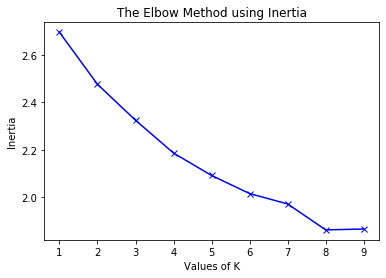

In [87]:
inertias = [] 
mapping2 = {} 
K = range(1,10) 

usacan_grouped_clustering = usacan_grouped.drop('City', 1)
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(usacan_grouped_clustering) 
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_ 

for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [88]:
# set number of clusters
kclusters = 6

#usacan_grouped_clustering = usacan_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(usacan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 3, 3, 3, 4, 3, 0, 3])

In [89]:
usacan_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [90]:
usacan_merged = usacan_venues_sorted

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
usacan_merged = usacan_merged.join(dfcsv.set_index('City'), on='City')

usacan_merged.head() # check the last columns!

Cluster Labels               City 1st Most Common Venue  \
0               1       Albany, N.Y.                   Pub   
1               0  Albuquerque, N.M.               Brewery   
2               0     Amarillo, Tex.    Mexican Restaurant   
3               3  Anchorage, Alaska    Seafood Restaurant   
4               3       Atlanta, Ga.                 Trail   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0        Ice Cream Shop                  Café      Sushi Restaurant   
1    Mexican Restaurant         Grocery Store            Restaurant   
2  Fast Food Restaurant            Steakhouse          Burger Joint   
3               Brewery                  Park            Steakhouse   
4                  Park    Mexican Restaurant               Brewery   

      5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                     Hotel          Burger Joint                  Park   
1                      Café                   Pub          Burger Joint   
2               Golf Course             BBQ Joint                  Park   
3        Mexican Restaurant             Gift Shop        Breakfast Spot   
4  Mediterranean Restaurant                   Bar         Grocery Store   

  8th Most Common Venue 9th Most Common Venue  \
0               Brewery        Sandwich Place   
1                   Bar               Theater   
2         Grocery Store            Restaurant   
3   Sporting Goods Shop         Movie Theater   
4                  Café                Market   

            10th Most Common Venue   Latitude   Longitude  
0                              Bar  42.652579  -73.756232  
1                   Breakfast Spot  35.084386 -106.650422  
2                 Asian Restaurant  35.221997 -101.831297  
3                 Sushi Restaurant  61.218056 -149.900278  
4  Southern / Soul Food Restaurant  33.748995  -84.387982

In [114]:
latitude = 40.9611755
longitude = -92.9987941999999
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(usacan_merged['Latitude'], usacan_merged['Longitude'], usacan_merged['City'], usacan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [115]:
def total_venue_categories(df):
    df_all_venues = df['1st Most Common Venue']
    df_all_venues = df_all_venues.append(df['2nd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['3rd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['4th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['5th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['6th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['7th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['8th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['9th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['10th Most Common Venue'])
    df_cnt = df_all_venues.value_counts().to_frame().reset_index()
    df_cnt.columns = ['Venue Category', 'Venue Count']
    df_cnt.sort_values(by = 'Venue Count', ascending = False)
#return the top 10 venue categories
    return df_cnt.head(10)

In [116]:
usacan_cluster0 = usacan_merged.loc[usacan_merged['Cluster Labels'] == 0, usacan_merged.columns[[1] + list(range(2, usacan_merged.shape[1]))]]
usacan_cluster0

City 1st Most Common Venue    2nd Most Common Venue  \
1        Albuquerque, N.M.               Brewery       Mexican Restaurant   
2           Amarillo, Tex.    Mexican Restaurant     Fast Food Restaurant   
8            Bangor, Maine    Mexican Restaurant            Deli / Bodega   
15          Carlsbad, N.M.                 Hotel       Mexican Restaurant   
17      Charleston, W. Va.    Mexican Restaurant                   Bakery   
19          Cheyenne, Wyo.  Fast Food Restaurant       Mexican Restaurant   
33       El Centro, Calif.  Fast Food Restaurant         Department Store   
39          Fresno, Calif.    Mexican Restaurant               Steakhouse   
40   Grand Junction, Colo.         Grocery Store                   Winery   
45       Hot Springs, Ark.    Mexican Restaurant       Seafood Restaurant   
47      Idaho Falls, Idaho  Fast Food Restaurant       Mexican Restaurant   
55     Klamath Falls, Ore.    Mexican Restaurant            Grocery Store   
58         Lewiston, Idaho  Fast Food Restaurant            Grocery Store   
61      Long Beach, Calif.    Mexican Restaurant                  Brewery   
69            Mobile, Ala.    Seafood Restaurant       Mexican Restaurant   
70        Montgomery, Ala.        Sandwich Place            Grocery Store   
75      Nelson, B.C., Can.                   Pub     Fast Food Restaurant   
87            Pierre, S.D.                   Bar               Steakhouse   
98      Sacramento, Calif.    Mexican Restaurant  New American Restaurant   
103       San Jose, Calif.        Sandwich Place       Mexican Restaurant   
105         Santa Fe, N.M.    Mexican Restaurant                    Hotel   
109      Sioux Falls, S.D.    Mexican Restaurant           Ice Cream Shop   
110          Sitka, Alaska    Seafood Restaurant       Mexican Restaurant   
112      Springfield, Ill.        Sandwich Place                      Bar   
114       Springfield, Mo.        Ice Cream Shop       Mexican Restaurant   
119           Toledo, Ohio  Fast Food Restaurant         Sushi Restaurant   
124    Virginia Beach, Va.    Seafood Restaurant           Breakfast Spot   
127       Wilmington, N.C.                  Café           Sandwich Place   

    3rd Most Common Venue 4th Most Common Venue  \
1           Grocery Store            Restaurant   
2              Steakhouse          Burger Joint   
8          Sandwich Place      Sushi Restaurant   
15              BBQ Joint          Burger Joint   
17                   Park    Chinese Restaurant   
19                  Hotel        Sandwich Place   
33     Mexican Restaurant        Breakfast Spot   
39           Burger Joint         Grocery Store   
40                    Gym    Mexican Restaurant   
45            Supermarket        Ice Cream Shop   
47             Steakhouse                  Park   
55        Thai Restaurant                 Diner   
58             Taco Place    Mexican Restaurant   
61                  Beach    Seafood Restaurant   
69          Grocery Store             BBQ Joint   
70   Fast Food Restaurant    Seafood Restaurant   
75             Restaurant           Gas Station   
87         Sandwich Place        Ice Cream Shop   
98         Sandwich Place      Sushi Restaurant   
103         Grocery Store        Ice Cream Shop   
105         Grocery Store     French Restaurant   
109                  Café                  Park   
110                 Hotel         National Park   
112  Gym / Fitness Center    Mexican Restaurant   
114                   Bar   Japanese Restaurant   
119                 Diner               Brewery   
124         Grocery Store                 Beach   
127          Burger Joint                   Bar   

               5th Most Common Venue    6th Most Common Venue  \
1                               Café                      Pub   
2                        Golf Course                BBQ Joint   
8                            Brewery                    Hotel   
15                          Pharmacy           D

In [133]:
cluster6_cities = usacan_merged.loc[usacan_merged['Cluster Labels'] == 0, ['City']]
cluster6_cities['City'].tolist()

['Albuquerque, N.M.',
 'Amarillo, Tex.',
 'Bangor, Maine',
 'Carlsbad, N.M.',
 'Charleston, W. Va.',
 'Cheyenne, Wyo.',
 'El Centro, Calif.',
 'Fresno, Calif.',
 'Grand Junction, Colo.',
 'Hot Springs, Ark.',
 'Idaho Falls, Idaho',
 'Klamath Falls, Ore.',
 'Lewiston, Idaho',
 'Long Beach, Calif.',
 'Mobile, Ala.',
 'Montgomery, Ala.',
 'Nelson, B.C., Can.',
 'Pierre, S.D.',
 'Sacramento, Calif.',
 'San Jose, Calif.',
 'Santa Fe, N.M.',
 'Sioux Falls, S.D.',
 'Sitka, Alaska',
 'Springfield, Ill.',
 'Springfield, Mo.',
 'Toledo, Ohio',
 'Virginia Beach, Va.',
 'Wilmington, N.C.']

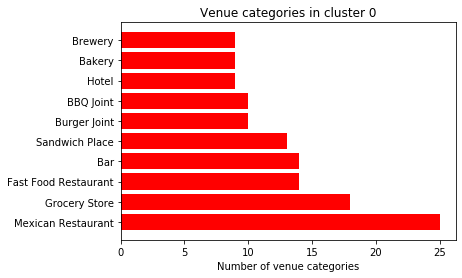

In [94]:

#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(usacan_merged[usacan_merged['Cluster Labels'] == 0])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center', color=rainbow[-1])
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 0')
 
plt.show()

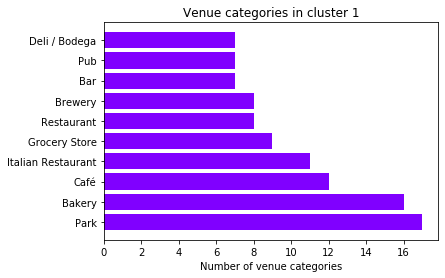

In [96]:

#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(usacan_merged[usacan_merged['Cluster Labels'] == 1])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center', color=rainbow[0])
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 1')
 
plt.show()

In [134]:
cluster6_cities = usacan_merged.loc[usacan_merged['Cluster Labels'] == 1, ['City']]
cluster6_cities['City'].tolist()

['Albany, N.Y.',
 'Boston, Mass.',
 'Calgary, Alba., Can.',
 'Charlotte, N.C.',
 'Columbus, Ohio',
 'Edmonton, Alb., Can.',
 'Kingston, Ont., Can.',
 'London, Ont., Can.',
 'Manchester, N.H.',
 'Montpelier, Vt.',
 'Montreal, Que., Can.',
 'New Haven, Conn.',
 'New York, N.Y.',
 'Newark, N.J.',
 'Oakland, Calif.',
 'Providence, R.I.',
 'San Francisco, Calif.',
 'Springfield, Mass.',
 'St. John, N.B., Can.',
 'Syracuse, N.Y.',
 'Tampa, Fla.',
 'Toronto, Ont., Can.',
 'Tulsa, Okla.']

In [97]:
usacan_cluster2 = usacan_merged.loc[usacan_merged['Cluster Labels'] == 2, usacan_merged.columns[[1] + list(range(2, usacan_merged.shape[1]))]]
usacan_cluster2

City 1st Most Common Venue       2nd Most Common Venue  \
80  Nome, Alaska                  Café  Construction & Landscaping   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
80               Airport        Sandwich Place   Japanese Restaurant   

   6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
80                  Farm   Dumpling Restaurant  Eastern European Restaurant   

   9th Most Common Venue 10th Most Common Venue   Latitude   Longitude  
80     Electronics Store     English Restaurant  64.501111 -165.406389

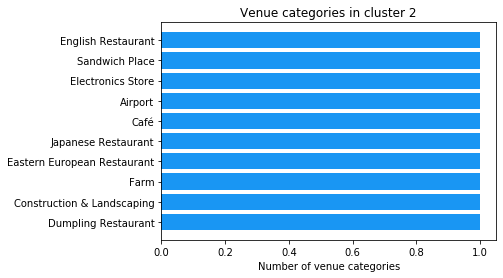

In [98]:

#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(usacan_merged[usacan_merged['Cluster Labels'] == 2])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center', color=rainbow[1])
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 2')
 
plt.show()

In [99]:
usacan_cluster3 = usacan_merged.loc[usacan_merged['Cluster Labels'] == 3, usacan_merged.columns[[1] + list(range(2, usacan_merged.shape[1]))]]
usacan_cluster3

City          1st Most Common Venue  \
3        Anchorage, Alaska             Seafood Restaurant   
4             Atlanta, Ga.                          Trail   
5             Austin, Tex.                          Hotel   
7           Baltimore, Md.             Seafood Restaurant   
9         Birmingham, Ala.             Italian Restaurant   
10          Bismarck, N.D.                            Bar   
11            Boise, Idaho                        Brewery   
13           Buffalo, N.Y.                            Bar   
16        Charleston, S.C.             Seafood Restaurant   
20           Chicago, Ill.                          Hotel   
21        Cincinnati, Ohio                           Park   
22         Cleveland, Ohio                        Brewery   
23          Columbia, S.C.                 Ice Cream Shop   
25            Dallas, Tex.                           Park   
26           Denver, Colo.                          Hotel   
27        Des Moines, Iowa             Italian Restaurant   
28          Detroit, Mich.                            Bar   
29           Dubuque, Iowa                            Bar   
30           Duluth, Minn.                        Brewery   
34           El Paso, Tex.                            Bar   
35            Eugene, Ore.                        Brewery   
36             Fargo, N.D.                        Brewery   
37        Flagstaff, Ariz.                        Brewery   
38        Fort Worth, Tex.        New American Restaurant   
41     Grand Rapids, Mich.                        Brewery   
43           Helena, Mont.                           Café   
44        Honolulu, Hawaii            Japanese Restaurant   
46           Houston, Tex.                           Park   
48      Indianapolis, Ind.             Mexican Restaurant   
49          Jackson, Miss.                 Sandwich Place   
50      Jacksonville, Fla.                 Sandwich Place   
51          Juneau, Alaska             Seafood Restaurant   
52        Kansas City, Mo.                        Brewery   
53          Key West, Fla.                          Hotel   
56        Knoxville, Tenn.                            Bar   
57         Las Vegas, Nev.                         Casino   
59           Lincoln, Neb.                        Brewery   
62     Los Angeles, Calif.                 Ice Cream Shop   
63         Louisville, Ky.                           Park   
65          Memphis, Tenn.                            Bar   
66             Miami, Fla.                          Hotel   
67         Milwaukee, Wis.                        Theater   
68      Minneapolis, Minn.                        Theater   
74        Nashville, Tenn.                            Bar   
77        New Orleans, La.                          Hotel   
82    Oklahoma City, Okla.                        Brewery   
83             Omaha, Neb.                          Hotel   
84      Ottawa, Ont., Can.                     Restaurant   
85       Philadelphia, Pa.  Vegetarian / Vegan Restaurant   
86          Phoenix, Ariz.                 Ice Cream Shop   
88         Pittsburgh, Pa.                 Ice Cream Shop   
89         Portland, Maine                            Bar   
90          Portland, Ore.                          Hotel   
92      Quebec, Que., Can.              French Restaurant   
93           Raleigh, N.C.                        Brewery   
94              Reno, Nev.                 Breakfast Spot   
96           Richmond, Va.                           Park   
97            Roanoke, Va.                 Breakfast Spot   
99    Salt Lake City, Utah                          Hotel   
100      San Antonio, Tex.                          Hotel   
101      San Diego, Calif.                    Zoo Exhibit   
104         San Juan, P.R.           Caribbean Restaurant   
106          Savannah, Ga.                          Plaza   
107         Seattle, Wash.                 Ice Cream Shop   
108        Shreveport, La.                          Hotel

In [135]:
cluster6_cities = usacan_merged.loc[usacan_merged['Cluster Labels'] == 3, ['City']]
cluster6_cities['City'].tolist()

['Anchorage, Alaska',
 'Atlanta, Ga.',
 'Austin, Tex.',
 'Baltimore, Md.',
 'Birmingham, Ala.',
 'Bismarck, N.D.',
 'Boise, Idaho',
 'Buffalo, N.Y.',
 'Charleston, S.C.',
 'Chicago, Ill.',
 'Cincinnati, Ohio',
 'Cleveland, Ohio',
 'Columbia, S.C.',
 'Dallas, Tex.',
 'Denver, Colo.',
 'Des Moines, Iowa',
 'Detroit, Mich.',
 'Dubuque, Iowa',
 'Duluth, Minn.',
 'El Paso, Tex.',
 'Eugene, Ore.',
 'Fargo, N.D.',
 'Flagstaff, Ariz.',
 'Fort Worth, Tex.',
 'Grand Rapids, Mich.',
 'Helena, Mont.',
 'Honolulu, Hawaii',
 'Houston, Tex.',
 'Indianapolis, Ind.',
 'Jackson, Miss.',
 'Jacksonville, Fla.',
 'Juneau, Alaska',
 'Kansas City, Mo.',
 'Key West, Fla.',
 'Knoxville, Tenn.',
 'Las Vegas, Nev.',
 'Lincoln, Neb.',
 'Los Angeles, Calif.',
 'Louisville, Ky.',
 'Memphis, Tenn.',
 'Miami, Fla.',
 'Milwaukee, Wis.',
 'Minneapolis, Minn.',
 'Nashville, Tenn.',
 'New Orleans, La.',
 'Oklahoma City, Okla.',
 'Omaha, Neb.',
 'Ottawa, Ont., Can.',
 'Philadelphia, Pa.',
 'Phoenix, Ariz.',
 'Pittsburgh, 

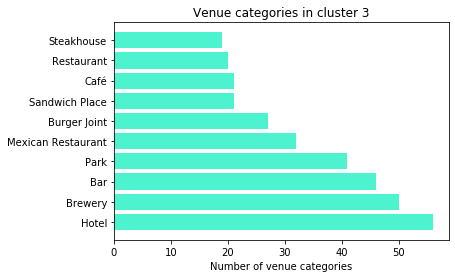

In [100]:
#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(usacan_merged[usacan_merged['Cluster Labels'] == 3])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center',color=rainbow[2])
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 3')
 
plt.show()

In [101]:
usacan_cluster4 = usacan_merged.loc[usacan_merged['Cluster Labels'] == 4, usacan_merged.columns[[1] + list(range(2, usacan_merged.shape[1]))]]
usacan_cluster4

City 1st Most Common Venue 2nd Most Common Venue  \
6              Baker, Ore.         Grocery Store           Gas Station   
42            Havre, Mont.  Fast Food Restaurant                   ATM   
73  Moose Jaw, Sask., Can.  Fast Food Restaurant            Restaurant   
95         Richfield, Utah  Fast Food Restaurant                 Hotel   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6                  Hotel    Mexican Restaurant        Ice Cream Shop   
42        Ice Cream Shop       Automotive Shop         Auto Workshop   
73                   Pub                 Hotel        Ice Cream Shop   
95        Sandwich Place            Steakhouse           Gas Station   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
6                  Diner        Sandwich Place              Pharmacy   
42        Sandwich Place         Train Station                   Inn   
73         Movie Theater     Convenience Store        Sandwich Place   
95         Deli / Bodega         Big Box Store            Taco Place   

   9th Most Common Venue 10th Most Common Venue   Latitude   Longitude  
6         Discount Store   Fast Food Restaurant  44.774875 -117.834385  
42           Supermarket              Irish Pub  48.549999 -109.684089  
73                  Bank          Grocery Store  50.391581 -105.534856  
95        Hardware Store                   Café  38.772467 -112.084094

In [136]:
cluster6_cities = usacan_merged.loc[usacan_merged['Cluster Labels'] == 4, ['City']]
cluster6_cities['City'].tolist()

['Baker, Ore.', 'Havre, Mont.', 'Moose Jaw, Sask., Can.', 'Richfield, Utah']

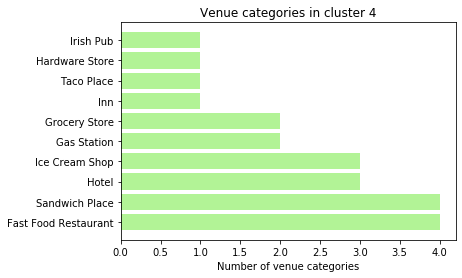

In [102]:
#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(usacan_merged[usacan_merged['Cluster Labels'] == 4])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center',color=rainbow[3])
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 4')
 
plt.show()

In [103]:
usacan_cluster5 = usacan_merged.loc[usacan_merged['Cluster Labels'] == 5, usacan_merged.columns[[1] + list(range(2, usacan_merged.shape[1]))]]
usacan_cluster5

City    1st Most Common Venue 2nd Most Common Venue  \
31  Eastport, Maine  State / Provincial Park    Seafood Restaurant   

         3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
31  Tourist Information Center                  Park                  Food   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
31       Border Crossing                  Café            Campground   

   9th Most Common Venue 10th Most Common Venue   Latitude  Longitude  
31             Gastropub             Lighthouse  44.906191 -66.989979

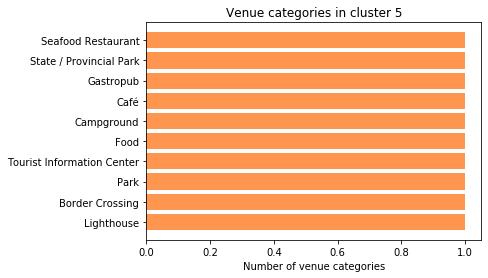

In [104]:
#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(usacan_merged[usacan_merged['Cluster Labels'] == 5])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center',color=rainbow[4])
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 5')
 
plt.show()

In [112]:
usacan_cluster6 = usacan_merged.loc[usacan_merged['Cluster Labels'] == 6, usacan_merged.columns[[1] + list(range(2, usacan_merged.shape[1]))]]
usacan_cluster6

Empty DataFrame
Columns: [City, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue, Latitude, Longitude]
Index: []

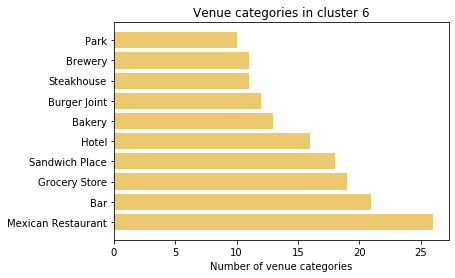

In [61]:
#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(usacan_merged[usacan_merged['Cluster Labels'] == 6])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center',color=rainbow[5])
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 6')
 
plt.show()

In [117]:
usacan_cluster7 = usacan_merged.loc[usacan_merged['Cluster Labels'] == 7, usacan_merged.columns[[1] + list(range(2, usacan_merged.shape[1]))]]
usacan_cluster7

Empty DataFrame
Columns: [City, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue, Latitude, Longitude]
Index: []

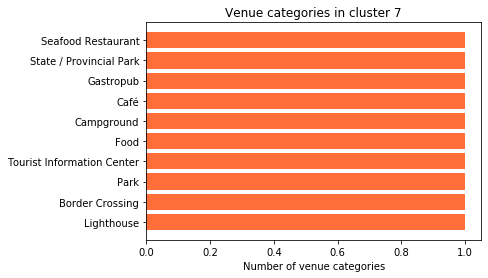

In [62]:
#count venue categories in all neighborhoods in the cluster
t0 = total_venue_categories(usacan_merged[usacan_merged['Cluster Labels'] == 7])

y_pos = np.arange(len(t0['Venue Category']))
plt.barh(y_pos, t0['Venue Count'], align='center',color=rainbow[6])
plt.yticks(y_pos, t0['Venue Category'])
plt.xlabel('Number of venue categories')
plt.title('Venue categories in cluster 7')
 
plt.show()

In [131]:
cluster6_cities = usacan_merged.loc[usacan_merged['Cluster Labels'] == 4, ['City']]
cluster6_cities['City'].tolist()

City
6              Baker, Ore.
42            Havre, Mont.
73  Moose Jaw, Sask., Can.
95         Richfield, Utah

['Baker, Ore.', 'Havre, Mont.', 'Moose Jaw, Sask., Can.', 'Richfield, Utah']